In [ ]:
#Step 1: import the libraries

import torch
import torch.nn as nn           #neural network for layers, activations & loss functions.
import torch.optim as optim     #for optimization
from torchvision import datasets, transforms #Used to convert images to tensors and normalize them.
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [ ]:
# Step 2: Load MNIST dataset (without transform for mean/std calculation)
train_dataset = datasets.MNIST(root='data', train=True, download=True, transform=transform )

In [ ]:
# Step 3: Calculate Mean and Standard deviation of MNIST dataset to normlaize.
data = train_dataset.data.float()/255.0
mean = data.mean()
std = data.std()

print(f"Mean:{mean:.4f}")
print(f"Std :{std:.4f}")


Mean:0.1307
Std :0.3081


In [ ]:
# Step 4: Normalization (0,255) to (0,1) MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_data = datasets.MNIST(root='data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)  #64 images at a time in one batch

In [ ]:
class NNN_CNN(nn.Module):
    def __init__(self):
        super(NNN_CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, kernel_size=3, padding=1)  # 1 input channel, 8 filters
        self.pool = nn.MaxPool2d(2, 2)  # reduces image size by half
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3, padding=1) # deeper layer with 16 filters
        self.fc1 = nn.Linear(16 * 7 * 7, 64)  # fully connected layer
        self.fc2 = nn.Linear(64, 10)          # 10 outputs for 10 digits (0–9)
        self.relu = nn.ReLU()                 # activation function

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 16*7*7)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

    model = NNN_CNN()
    print(model)


NNN_CNN(
  (conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
)


In [ ]:
model = NNN_CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001) # Measures "how wrong" our predictions are with learning rate 0.001 (default)

In [ ]:
epochs = 5
losses = []

for epoch in range(epochs):
    total_loss = 0
    for images, labels in train_loader:
          optimizer.zero_grad()       # clear old gradients
          outputs = model(images)     # forward pass
          loss = criterion(outputs,labels)# calculate loss
          loss.backward()             # backpropagation
          optimizer.step()            # update weights
          total_loss += loss.item()

    average_loss = total_loss / len(train_loader)
    losses.append(average_loss)
    print("Epoch:", epoch + 1, "| Loss:", round(average_loss, 4))


Epoch: 1 | Loss: 0.2322
Epoch: 2 | Loss: 0.0701
Epoch: 3 | Loss: 0.0508
Epoch: 4 | Loss: 0.0416
Epoch: 5 | Loss: 0.0332


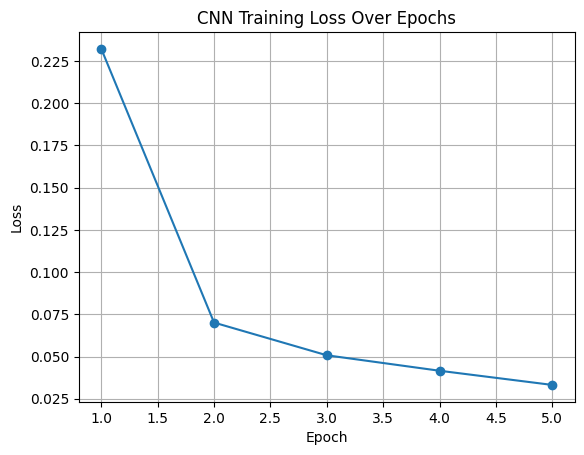

In [ ]:
plt.plot(range(1, epochs + 1), losses, marker='o')
plt.title("CNN Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

In [ ]:
epochs = 10
losses = []

for epoch in range(epochs):
    total_loss = 0
    for images, labels in train_loader:
          optimizer.zero_grad()       # clear old gradients
          outputs = model(images)     # forward pass
          loss = criterion(outputs,labels)# calculate loss
          loss.backward()             # backpropagation
          optimizer.step()            # update weights
          total_loss += loss.item()

    average_loss = total_loss / len(train_loader)
    losses.append(average_loss)
    print("Epoch:", epoch + 1, "| Loss:", round(average_loss, 4))


Epoch: 1 | Loss: 0.0279
Epoch: 2 | Loss: 0.0238
Epoch: 3 | Loss: 0.0212
Epoch: 4 | Loss: 0.0175
Epoch: 5 | Loss: 0.0149
Epoch: 6 | Loss: 0.0142
Epoch: 7 | Loss: 0.0123
Epoch: 8 | Loss: 0.0107
Epoch: 9 | Loss: 0.0092
Epoch: 10 | Loss: 0.0084


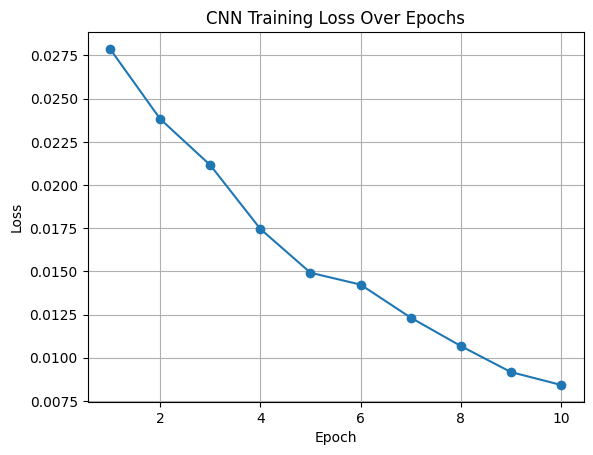

In [ ]:
plt.plot(range(1, epochs + 1), losses, marker='o')
plt.title("CNN Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

In [ ]:
test = datasets.MNIST(root='data', train=False, download=True, transform=transform)
testloader = DataLoader(test, batch_size=1000, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f'Test Accuracy: {test_accuracy:.2f}%')


Test Accuracy: 98.79%


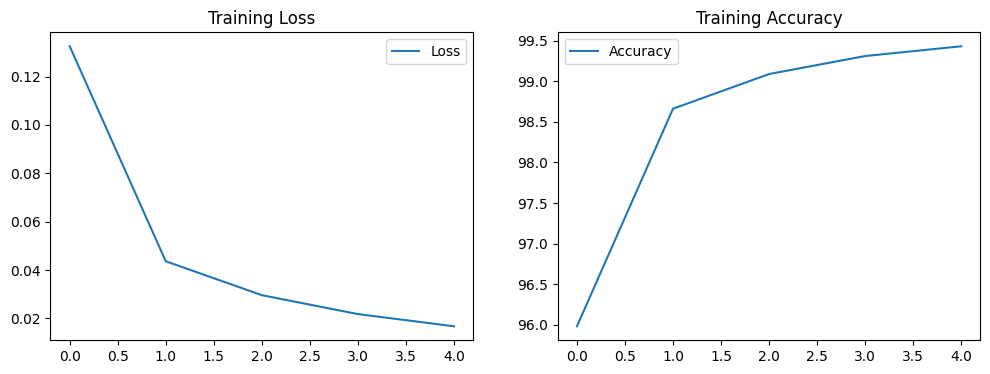

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(train_loss, label="Loss")
plt.title("Training Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_acc, label="Accuracy")
plt.title("Training Accuracy")
plt.legend()

plt.show()